In [33]:
#Import Requirements

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
# import keras 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, UpSampling2D,Dropout
from keras.datasets import mnist

In [34]:
#Load MNIST DataSet
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load_data()


In [35]:
#Select Digits I want to Train
selected_digits = [1,2,3,4, 5,6,7,8, 9]

In [36]:
#Filter Data

#This checks if the selected train data is full for not
train_filter = np.isin(y_train_full, selected_digits)
x_train = x_train_full[train_filter]
y_train = y_train_full[train_filter]

# Filter test data
test_filter = np.isin(y_test_full, selected_digits)
x_test = x_test_full[test_filter]
y_test = y_test_full[test_filter]

# print("Filtered x_train shape:", x_train.shape)
# print("Filtered x_test shape:", x_test.shape)

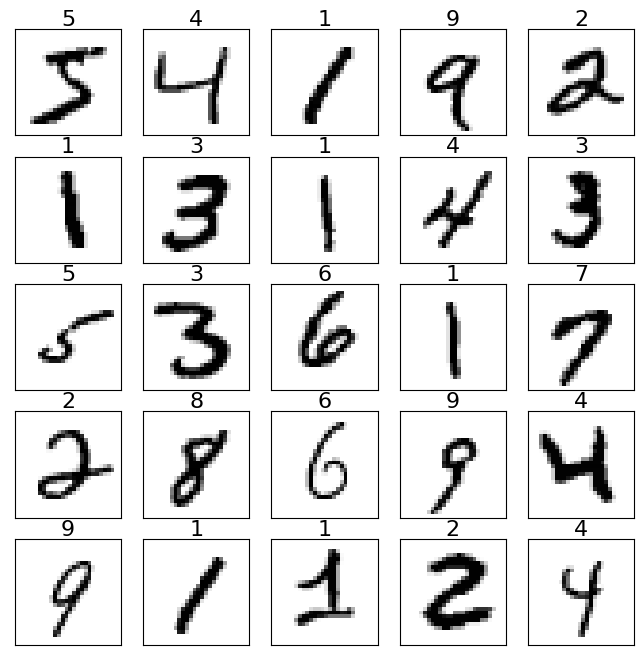

In [37]:
plt.figure(figsize = (8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
  plt.imshow(x_train[i], cmap = plt.cm.binary )
  plt.xticks([])
  plt.yticks([])

plt.show()

In [38]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

In [39]:
#Noise
# 
noise_factor = 0.4

# Add noise to the images
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip pixel values to [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [40]:
# Split validation data from test data
val_images = x_test_noisy[:int(len(x_test_noisy)*0.9)]
val_images_clean = x_test[:int(len(x_test)*0.9)]

test_images = x_test_noisy[int(len(x_test_noisy)*0.1):]
test_images_clean = x_test[int(len(x_test)*0.1):]


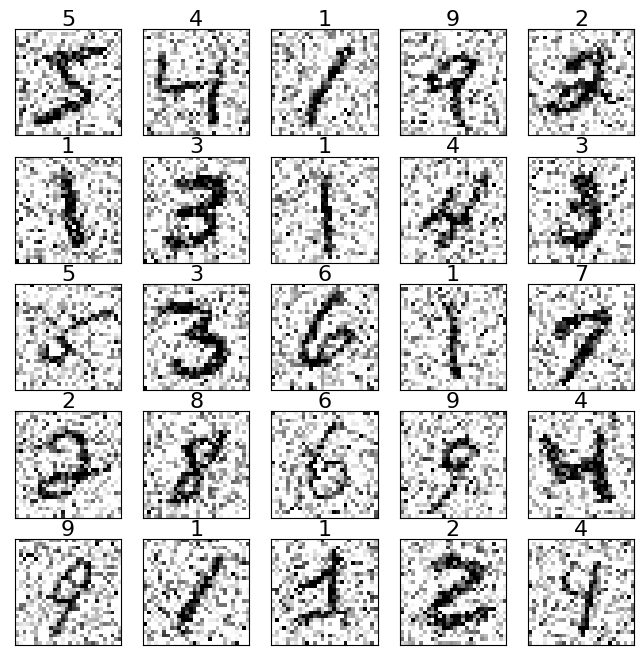

In [41]:
plt.figure(figsize = (8,8))

for i in range(25):      
      plt.subplot(5,5,i+1)
      plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
      plt.imshow(x_train_noisy[i].reshape(1,28,28)[0], cmap = plt.cm.binary )
      plt.xticks([])
      plt.yticks([])

plt.show()

In [42]:
model = Sequential()
# encoder network
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))



# decoder network
model.add(Conv2D(filters = 512, kernel_size = (2,2), activation = 'relu', padding = 'same'))

model.add(tf.keras.layers.Conv2DTranspose(filters = 512, kernel_size = (2,2), strides = (2,2),activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))


model.add(tf.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(filters = 1, kernel_size = (2,2), activation = 'relu', padding = 'same'))


# to get the summary of the model
# model.summary()

In [43]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [44]:
#Training
EPOCHS = 5
BATCH_SIZE = 256

history = model.fit(
    x_train_noisy, x_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(val_images, val_images_clean)
)


Epoch 1/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.7789 - loss: 0.1428 - val_accuracy: 0.8133 - val_loss: 0.1097
Epoch 2/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.8201 - loss: 0.0106 - val_accuracy: 0.8134 - val_loss: 0.0898
Epoch 3/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.8199 - loss: 0.0089 - val_accuracy: 0.8194 - val_loss: 0.0141
Epoch 4/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.8195 - loss: 0.0081 - val_accuracy: 0.8195 - val_loss: 0.0085
Epoch 5/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.8201 - loss: 0.0078 - val_accuracy: 0.8195 - val_loss: 0.0092


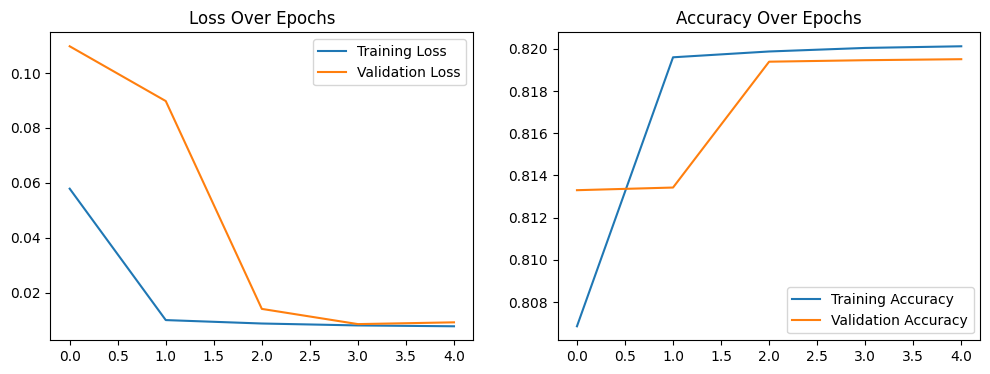

In [45]:
# Plotting loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

254/254 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step


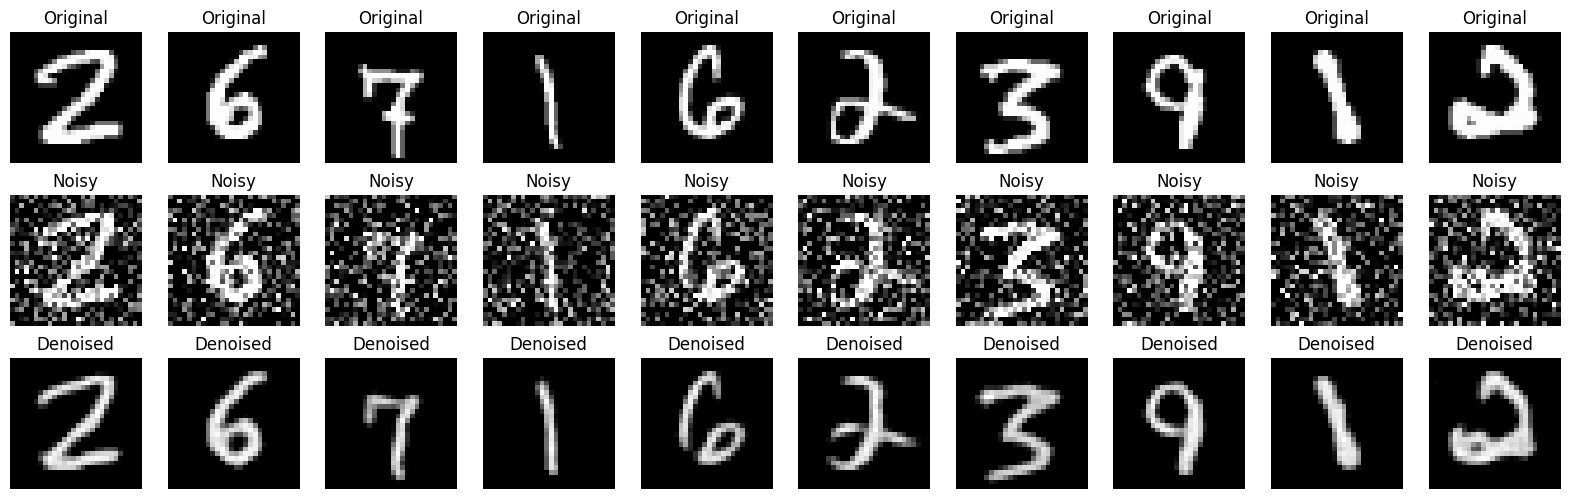

In [46]:
# Predict on test images
denoised_images = model.predict(test_images)

# Display original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images_clean[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Noisy images
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')
    
    # Denoised images
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.show()
